In [3]:
import numpy as np
import math
from munkres import Munkres
from matplotlib import pyplot as plt

### Equations ressort avec frottements

$\frac{d^2V}{dt^2} = -kV - F\frac{dV}{dt}$

In [4]:
T = 100
dt = 1

In [76]:
def compute_ressort(T, dt, V_0, V_1, F, k, Vmin, Vmax, noise=False, sigma=0):
    V = np.zeros((T, ))
    V[0] = V_0
    V[1] = V_1
    for t in range(2, T):
        V[t] = -dt**2*(k*V[t-1]) + 2*V[t-1] - V[t-2] - dt*F*(V[t-1] - V[t-2])
        if noise:
            V[t] += np.random.normal(0, sigma)
        if V[t] < Vmin:
            F = - F
        elif V[t] > Vmax:
            F= - F
    Y = np.random.binomial(1,min(0.9,abs(F)+sigma),1)
    print(Y)

    return V,Y

In [77]:
V1,Y1 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.1, k=1, Vmin=0.05, Vmax=2)

[0]


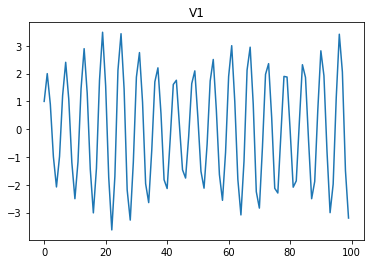

In [78]:
plt.plot(range(T), V1)
plt.title('V1')
plt.show()

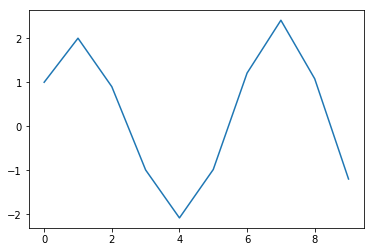

In [79]:
plt.plot(range(10), V1[:10])
plt.show()

In [80]:
V2,Y2 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.2, k=1, Vmin=0.05, Vmax=2, noise=True, sigma=0.2)

[0]


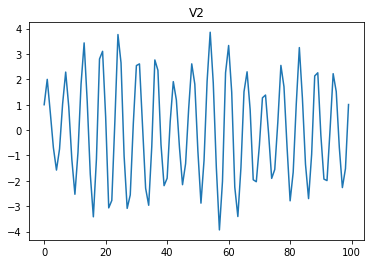

In [81]:
plt.plot(range(T), V2)
plt.title('V2')
plt.show()

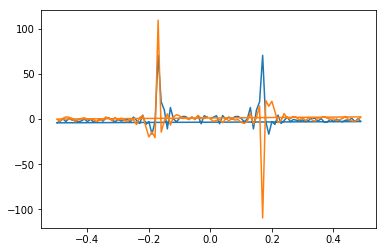

In [82]:
sp = np.fft.fft(V2)
freq = np.fft.fftfreq(T, dt)
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

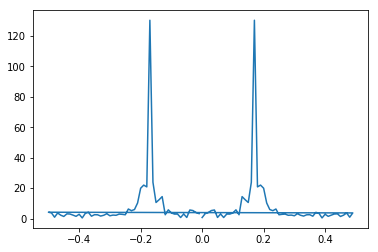

In [83]:
plt.plot(freq, abs(sp))
plt.show()

In [84]:
#def autocorr(x, t=0):
    #np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))
    #np.corrcoef(x)

In [85]:
def descriptor(V):
    fourier = abs(np.fft.fft(V))
    freq = np.fft.fftfreq(len(V))
    fr_max = freq[np.argmax(fourier)]
    return np.array([np.mean(V), np.std(V), np.corrcoef(V), np.std(fourier),fr_max, fr_max/np.max(fourier)])

In [87]:
desc1 = descriptor(V1)
desc2 = descriptor(V2)
desc1 = np.concatenate((desc1,Y1))
desc2 = np.concatenate((desc2,Y2))
desc1,desc2

(array([  1.11561035e-02,   1.93825786e+00,   1.00000000e+00,
          1.80783668e+01,  -1.70000000e-01,  -1.35963560e-03,
          0.00000000e+00]),
 array([  6.66021124e-03,   1.99524915e+00,   1.00000000e+00,
          1.84089500e+01,   1.70000000e-01,   1.30360490e-03,
          0.00000000e+00]))

In [36]:

dist = np.linalg.norm(desc1 - desc2)
dist

1.6715729547853364